In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Data
data = pd.read_csv("Automobile_data.csv")
df = pd.DataFrame(data)
print(df.head(15))

    symboling normalized-losses         make fuel-type aspiration  \
0           3                 ?  alfa-romero       gas        std   
1           3                 ?  alfa-romero       gas        std   
2           1                 ?  alfa-romero       gas        std   
3           2               164         audi       gas        std   
4           2               164         audi       gas        std   
5           2                 ?         audi       gas        std   
6           1               158         audi       gas        std   
7           1                 ?         audi       gas        std   
8           1               158         audi       gas      turbo   
9           0                 ?         audi       gas      turbo   
10          2               192          bmw       gas        std   
11          0               192          bmw       gas        std   
12          0               188          bmw       gas        std   
13          0               188   

# 1. Data Overview

In [4]:
print("Numbers of Records :",df.shape[0])
print("Numbers of Records :",df.shape[1])

Numbers of Records : 205
Numbers of Records : 26


In [5]:
# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# 2. Data Types and Missing Values

In [6]:
print("\nData Types :\n",df.dtypes)
print("\nMissing Values :\n",df.isnull().sum())

missing_value = df.isnull().sum()
missing_value_with_types = missing_value[missing_value>0].index.to_list()

for i in missing_value_with_types:
    if i != 'num-of-doors':  
        df[i] = pd.to_numeric(df[i], errors='coerce')
        df[i] = df[i].fillna(df[i].mean())
    else:
        df[i] = df[i].astype('object')
        mode_value = df[i].mode()
        if not mode_value.empty: 
            df[i] = df[i].fillna(mode_value[0])
        else:
            print(f"No mode found for {i}.") 



Data Types :
 symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Missing Values :
 symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine

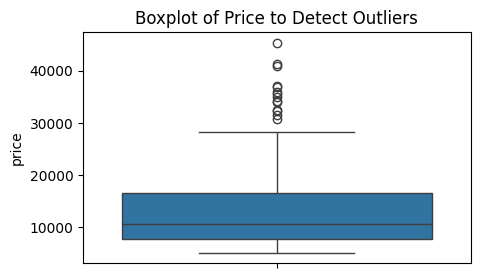

In [10]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, y='price')
plt.title('Boxplot of Price to Detect Outliers')
plt.show()

In [21]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = df[df['price']<upper_bound]

print(new_df.shape)

(191, 26)


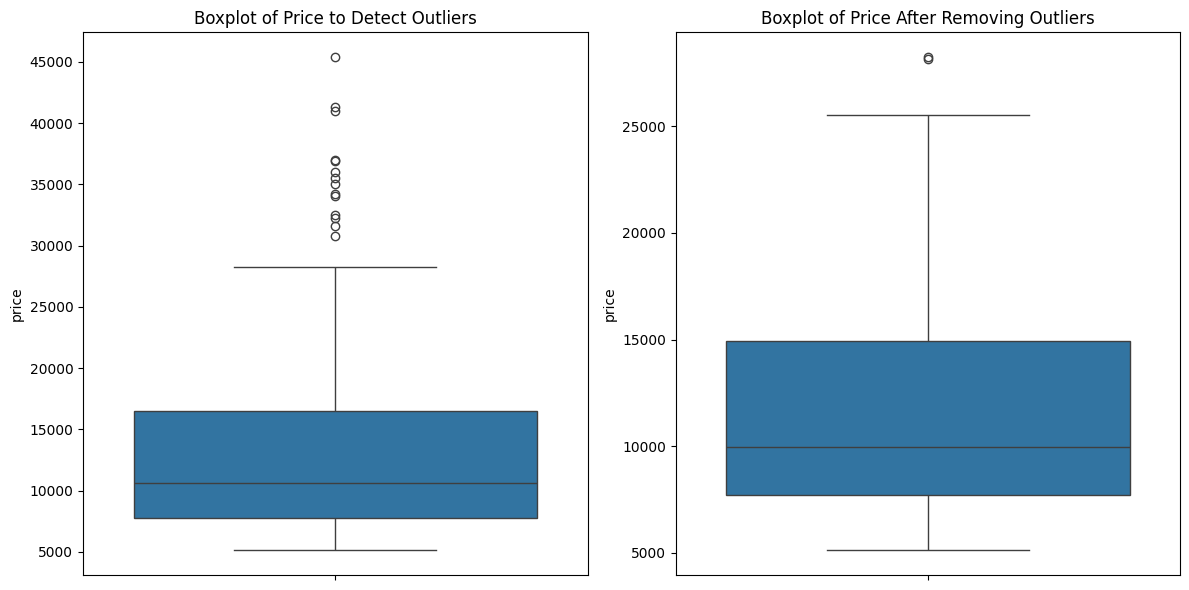

In [22]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='price')
plt.title('Boxplot of Price to Detect Outliers')


plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, y='price')
plt.title('Boxplot of Price After Removing Outliers')


plt.tight_layout()
plt.show()

# 3. Descriptive Statistics

In [12]:
print("\nDescriptive Statistics:\n", new_df.describe(include='all')) # type: ignore


Descriptive Statistics:
          symboling  normalized-losses    make fuel-type aspiration  \
count   191.000000         191.000000     191       191        191   
unique         NaN                NaN      21         2          2   
top            NaN                NaN  toyota       gas        std   
freq           NaN                NaN      32       172        155   
mean      0.837696         121.926702     NaN       NaN        NaN   
std       1.226824          32.685179     NaN       NaN        NaN   
min      -2.000000          65.000000     NaN       NaN        NaN   
25%       0.000000          96.500000     NaN       NaN        NaN   
50%       1.000000         122.000000     NaN       NaN        NaN   
75%       2.000000         141.000000     NaN       NaN        NaN   
max       3.000000         256.000000     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
count           191        191          191          

# 4. Correlation Analysis

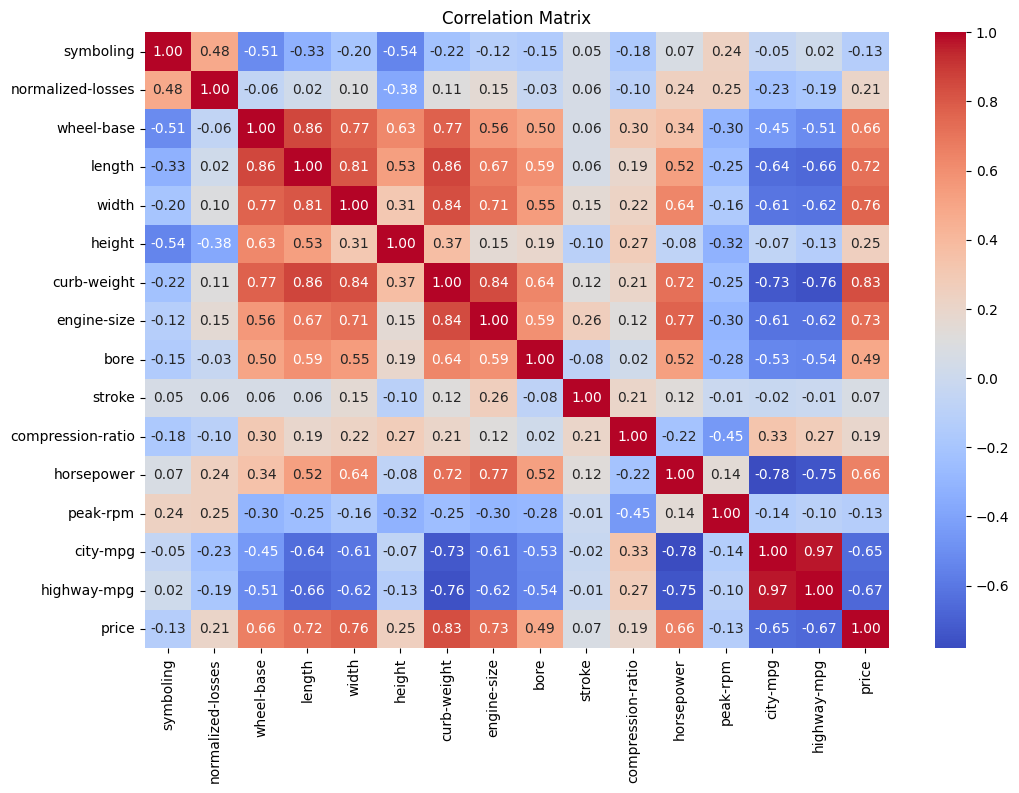

In [13]:
corr_list = new_df[new_df.describe().columns.to_list()].corr() # type: ignore
plt.figure(figsize=(12, 8))
sns.heatmap(corr_list, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Price Analysis

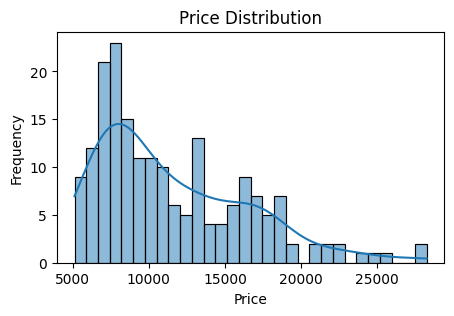

In [14]:
plt.figure(figsize=(5, 3))
sns.histplot(new_df['price'], bins=30, kde=True) # type:ignore
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

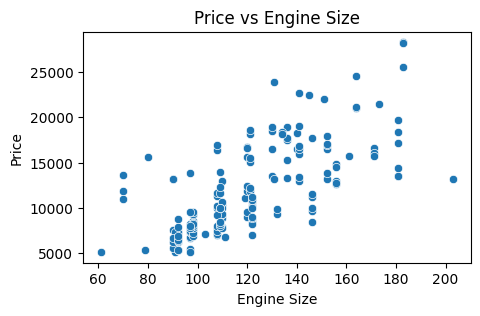

In [15]:
# Price vs. Features

plt.figure(figsize=(5, 3))
sns.scatterplot(data=new_df, x='engine-size', y='price') # type: ignore
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

# 6. Categorical Feature Analysis

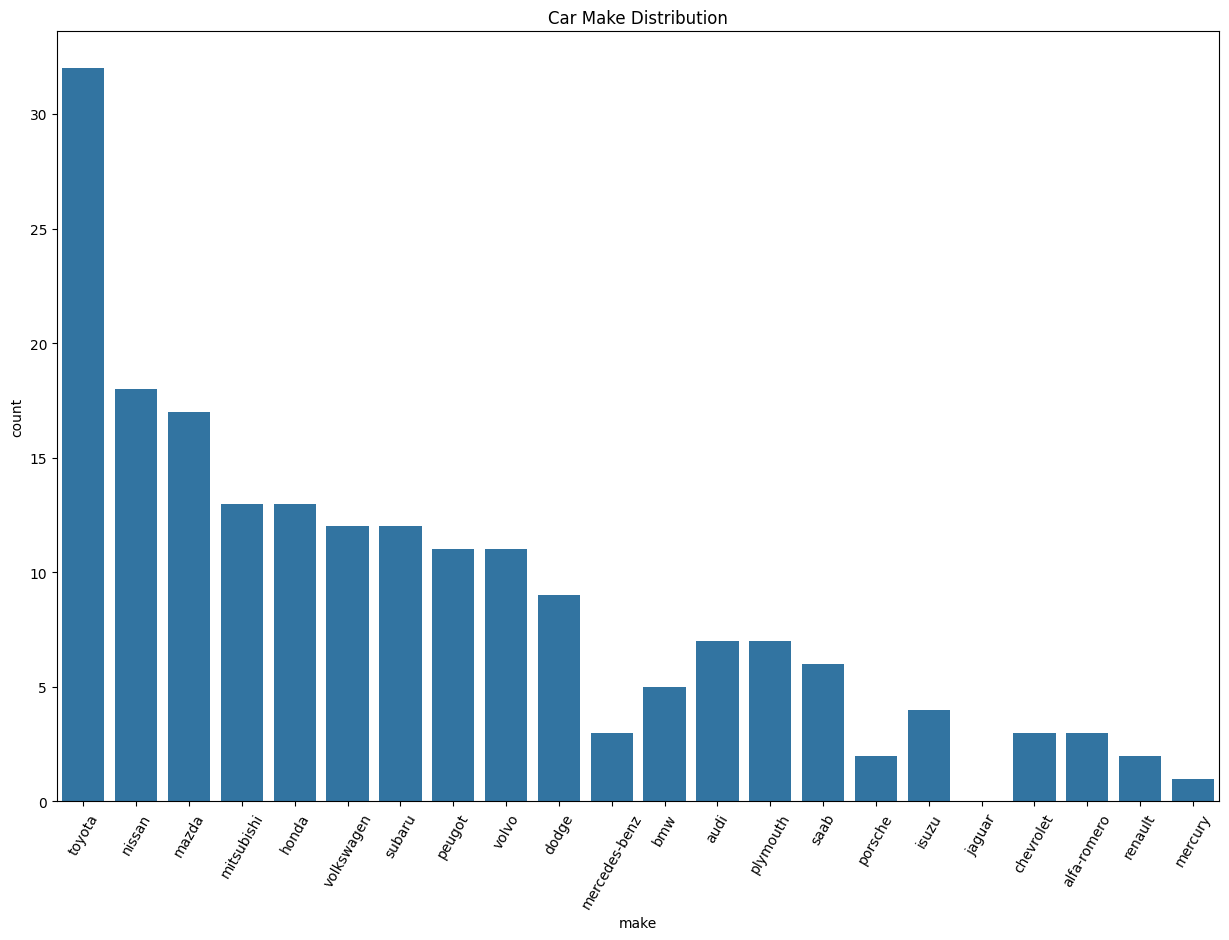

In [16]:
# Make Distribution


plt.figure(figsize=(15, 10))
sns.countplot(data=new_df, x='make', order=df['make'].value_counts().index) # type: ignore
plt.title('Car Make Distribution')
plt.xticks(rotation=60)
plt.show()

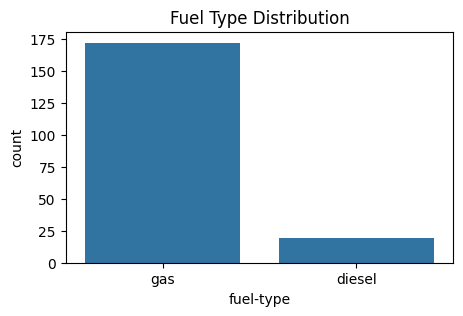

In [17]:
# Fuel Type Analysis

plt.figure(figsize=(5, 3))
sns.countplot(data=new_df, x='fuel-type') # type:ignore
plt.title('Fuel Type Distribution')
plt.show()

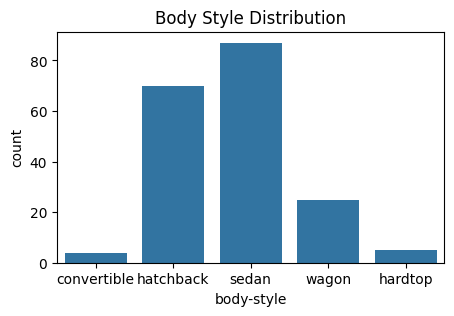

In [18]:
# Body Style Analysis

plt.figure(figsize=(5, 3))
sns.countplot(data=new_df, x='body-style') # type:ignore
plt.title('Body Style Distribution')
plt.show()

# 7. Engine and Performance Analysis

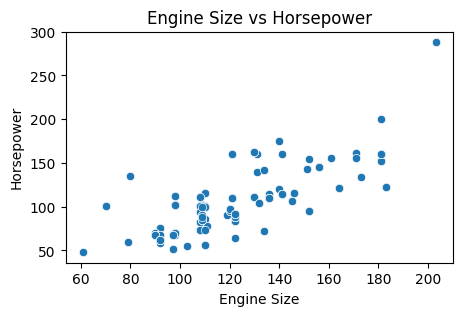

In [19]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=new_df, x='engine-size', y='horsepower') # type:ignore
plt.title('Engine Size vs Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.show()

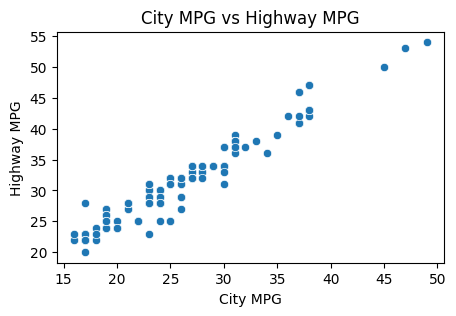

In [20]:
# Fuel Efficiency

plt.figure(figsize=(5, 3))
sns.scatterplot(data=new_df, x='city-mpg', y='highway-mpg') # type: ignore
plt.title('City MPG vs Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()

# 10. Visualizations

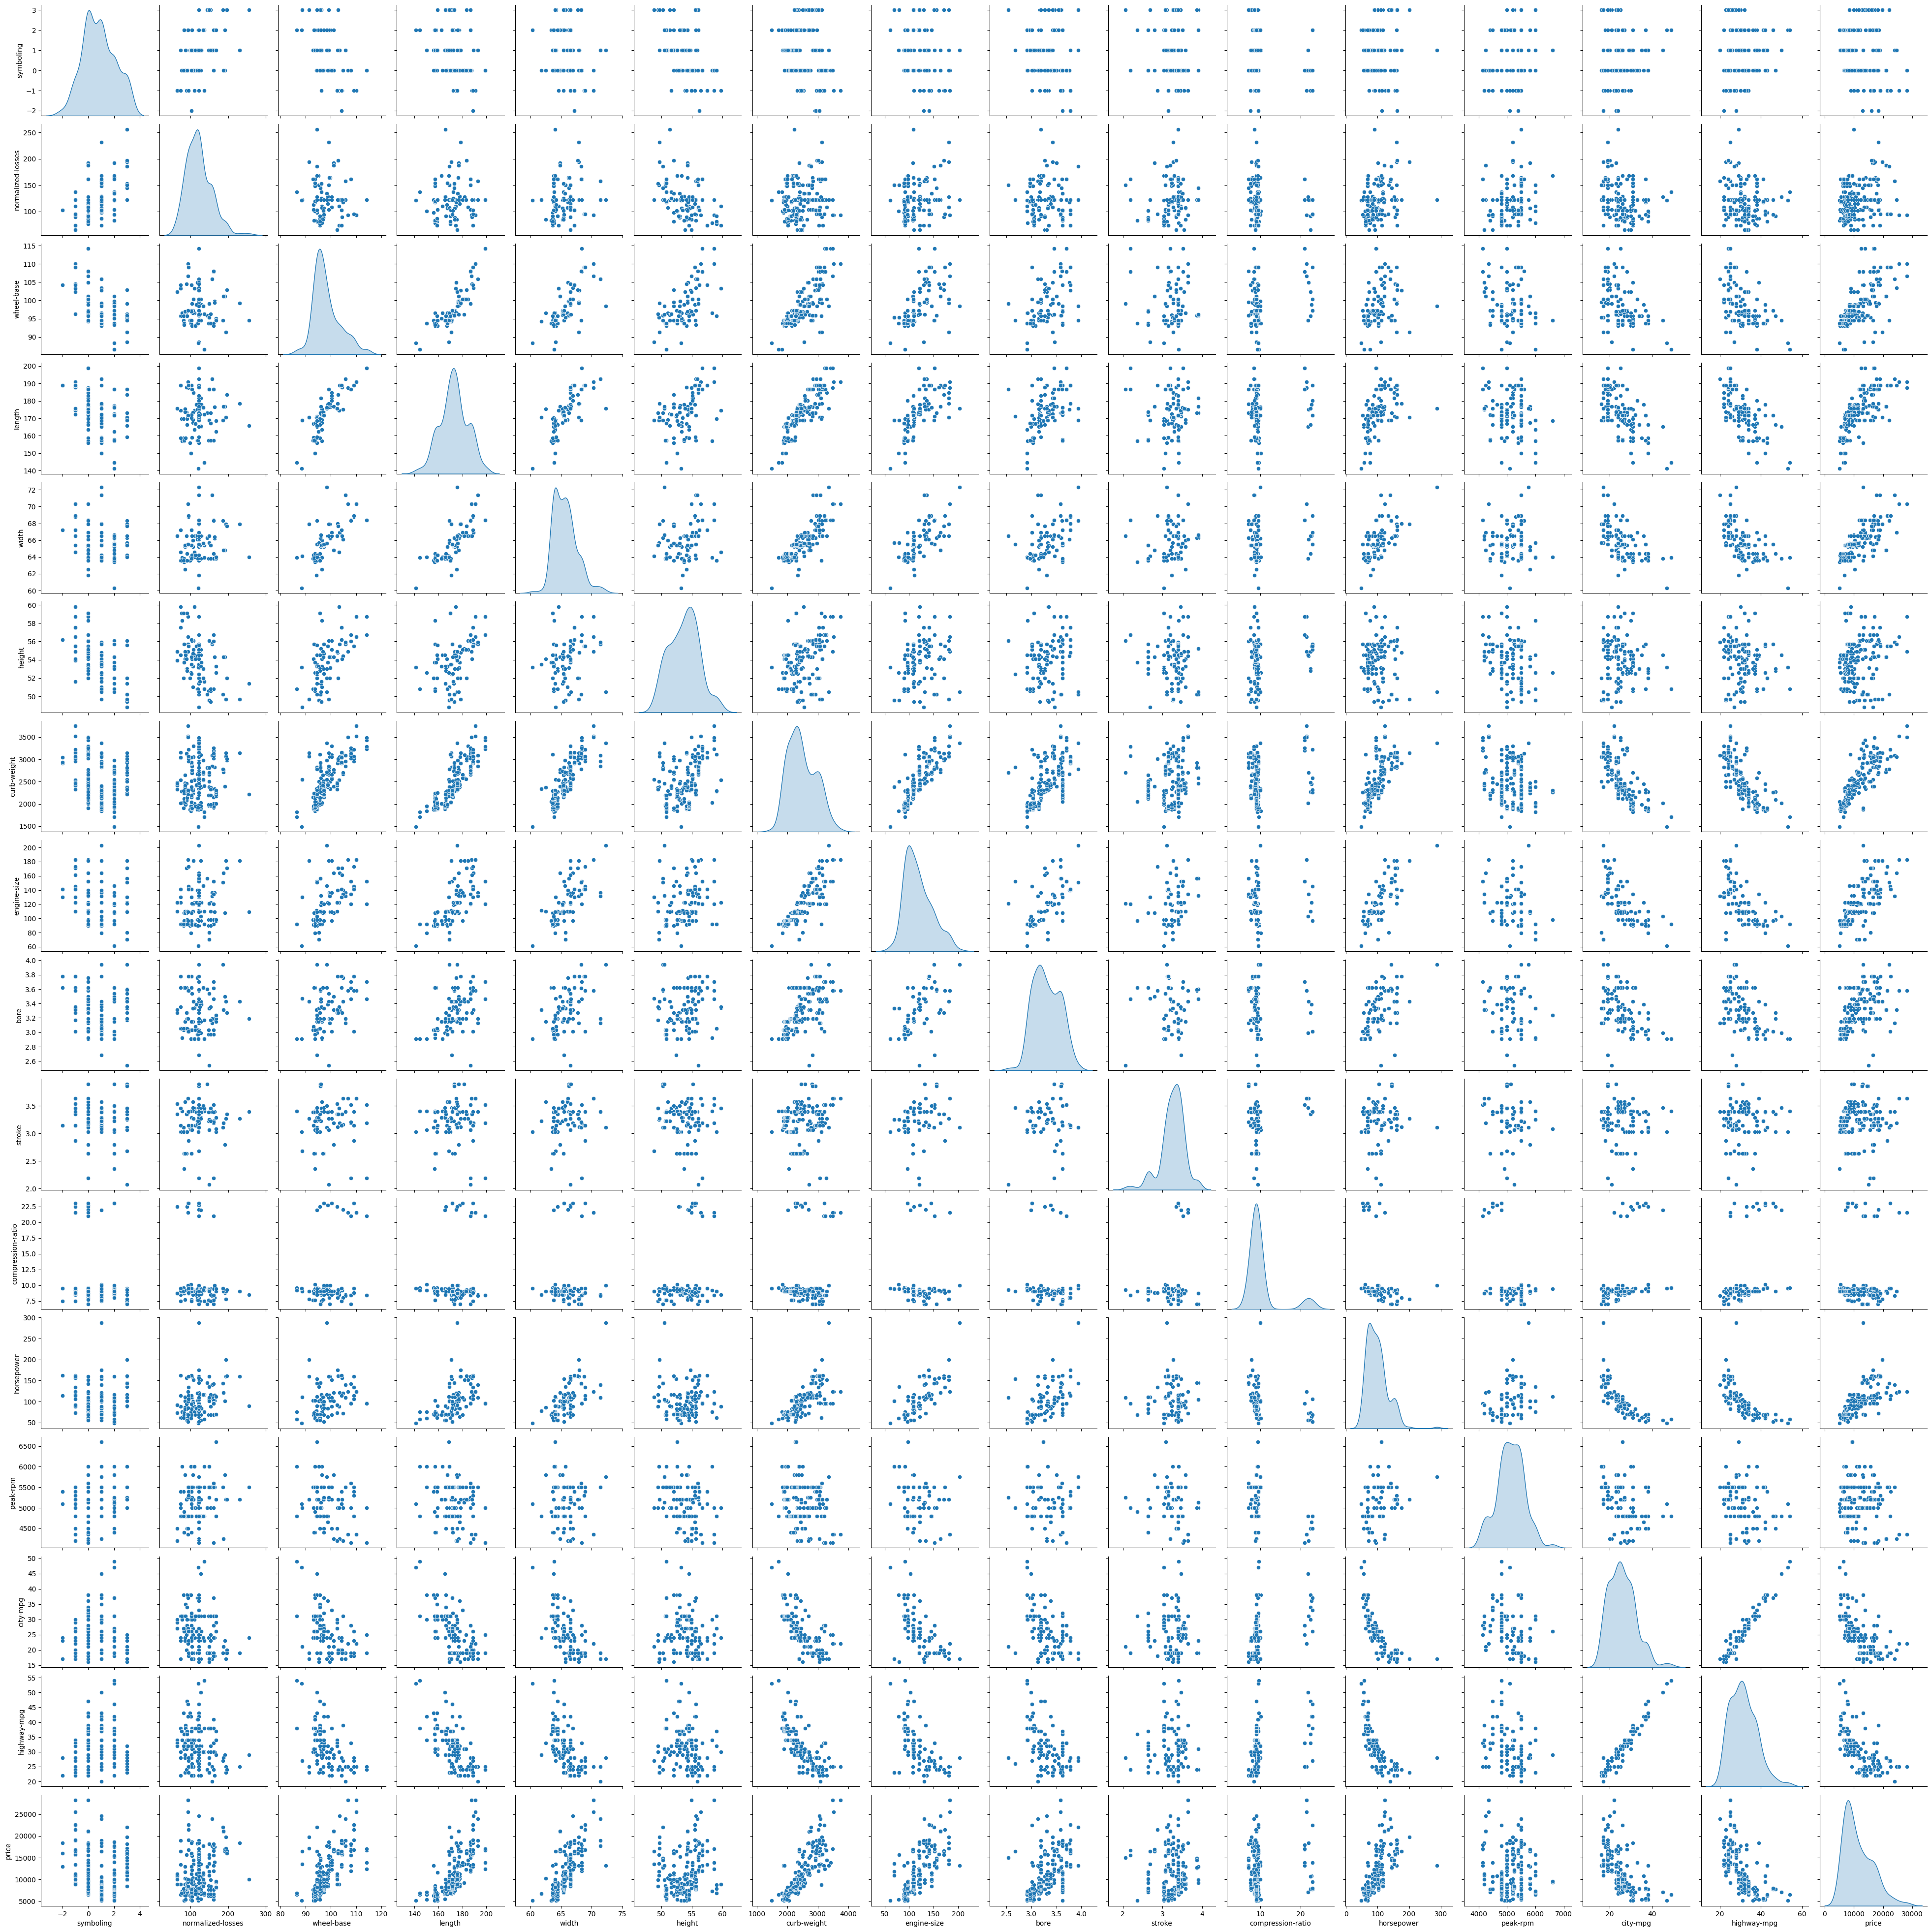

In [23]:
sns.pairplot(new_df, diag_kind='kde')
plt.show()

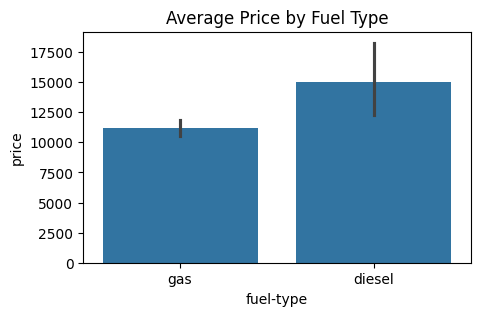

In [24]:
# Bar Charts

plt.figure(figsize=(5, 3))
sns.barplot(data=new_df, x='fuel-type', y='price', estimator='mean')
plt.title('Average Price by Fuel Type')
plt.show()


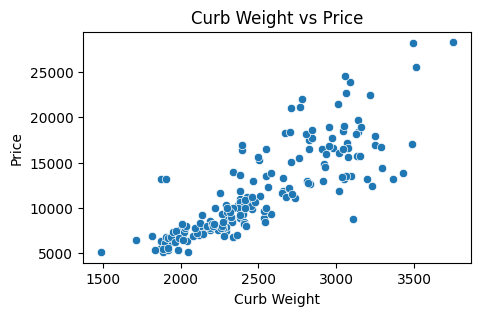

In [25]:
# Scatter Plots

plt.figure(figsize=(5, 3))
sns.scatterplot(data=new_df, x='curb-weight', y='price')
plt.title('Curb Weight vs Price')
plt.xlabel('Curb Weight')
plt.ylabel('Price')
plt.show()


# 11. Comparative Analysis Comparison by Fuel Type

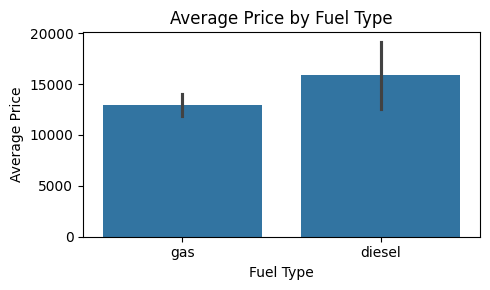

In [26]:
plt.figure(figsize=(5, 3))


sns.barplot(data=df, x='fuel-type', y='price', estimator='mean')


plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

plt.xticks()
plt.tight_layout()
plt.show()